In [17]:
%load_ext autoreload
%autoreload 2


from util import *
from myalgorithm import algorithm
from baseline import base_algorithm



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:

problem_file = 'STAGE1_1.json'
timelimit = 60

# np.random.seed(1)

with open(problem_file, 'r') as f:
    prob = json.load(f)

K = prob['K']

ALL_ORDERS = [Order(order_info) for order_info in prob['ORDERS']]
ALL_RIDERS = [Rider(rider_info) for rider_info in prob['RIDERS']]

DIST = np.array(prob['DIST'])
for r in ALL_RIDERS:
    r.T = np.round(DIST/r.speed + r.service_time)

alg_start_time = time.time()

exception = None

solution = None
'''try:
    # Run algorithm!
    solution = algorithm(K, ALL_ORDERS, ALL_RIDERS, DIST, timelimit)
except Exception as e:
    exception = f'{e}'''
solution = algorithm(K, ALL_ORDERS, ALL_RIDERS, DIST, timelimit)
#solution = base_algorithm(K, ALL_ORDERS, ALL_RIDERS, DIST, timelimit)

alg_end_time = time.time()

with open(problem_file, 'r') as f:
    prob = json.load(f)

K = prob['K']

ALL_ORDERS = [Order(order_info) for order_info in prob['ORDERS']]
ALL_RIDERS = [Rider(rider_info) for rider_info in prob['RIDERS']]

DIST = np.array(prob['DIST'])
for r in ALL_RIDERS:
    r.T = np.round(DIST/r.speed + r.service_time)

checked_solution = solution_check(K, ALL_ORDERS, ALL_RIDERS, DIST, solution)

checked_solution['time'] = alg_end_time - alg_start_time
checked_solution['timelimit_exception'] = (alg_end_time - alg_start_time) > timelimit + 1 # allowing additional 1 second!
checked_solution['exception'] = exception

checked_solution['prob_name'] = prob['name']
checked_solution['prob_file'] = problem_file

checked_solution

{'total_cost': 458457.1999999999,
 'avg_cost': 4584.571999999999,
 'num_drivers': 45,
 'total_dist': 192307,
 'feasible': True,
 'infeasibility': None,
 'bundles': [['BIKE', [11, 15, 0], [11, 0, 15]],
  ['BIKE', [10, 1], [1, 10]],
  ['BIKE', [39, 2], [39, 2]],
  ['BIKE', [5, 40, 35], [35, 5, 40]],
  ['BIKE', [19, 21, 12], [12, 19, 21]],
  ['BIKE', [13, 28], [28, 13]],
  ['BIKE', [37, 16], [37, 16]],
  ['BIKE', [22, 30, 24], [22, 24, 30]],
  ['BIKE', [50, 25, 55], [55, 25, 50]],
  ['BIKE', [43, 49, 29], [29, 43, 49]],
  ['BIKE', [33, 32, 45], [32, 33, 45]],
  ['BIKE', [36, 41], [41, 36]],
  ['BIKE', [38, 46, 53], [38, 46, 53]],
  ['BIKE', [63, 58], [58, 63]],
  ['BIKE', [82, 61, 68], [61, 68, 82]],
  ['BIKE', [77, 64, 93], [93, 64, 77]],
  ['BIKE', [83, 67], [67, 83]],
  ['BIKE', [94, 76], [76, 94]],
  ['BIKE', [78, 99], [99, 78]],
  ['CAR', [14, 42], [14, 42]],
  ['CAR', [26, 57], [26, 57]],
  ['CAR', [27, 69], [27, 69]],
  ['CAR', [4, 9], [4, 9]],
  ['CAR', [47, 6], [6, 47]],
  ['CAR'

In [ ]:
draw_route_solution(ALL_ORDERS, checked_solution)

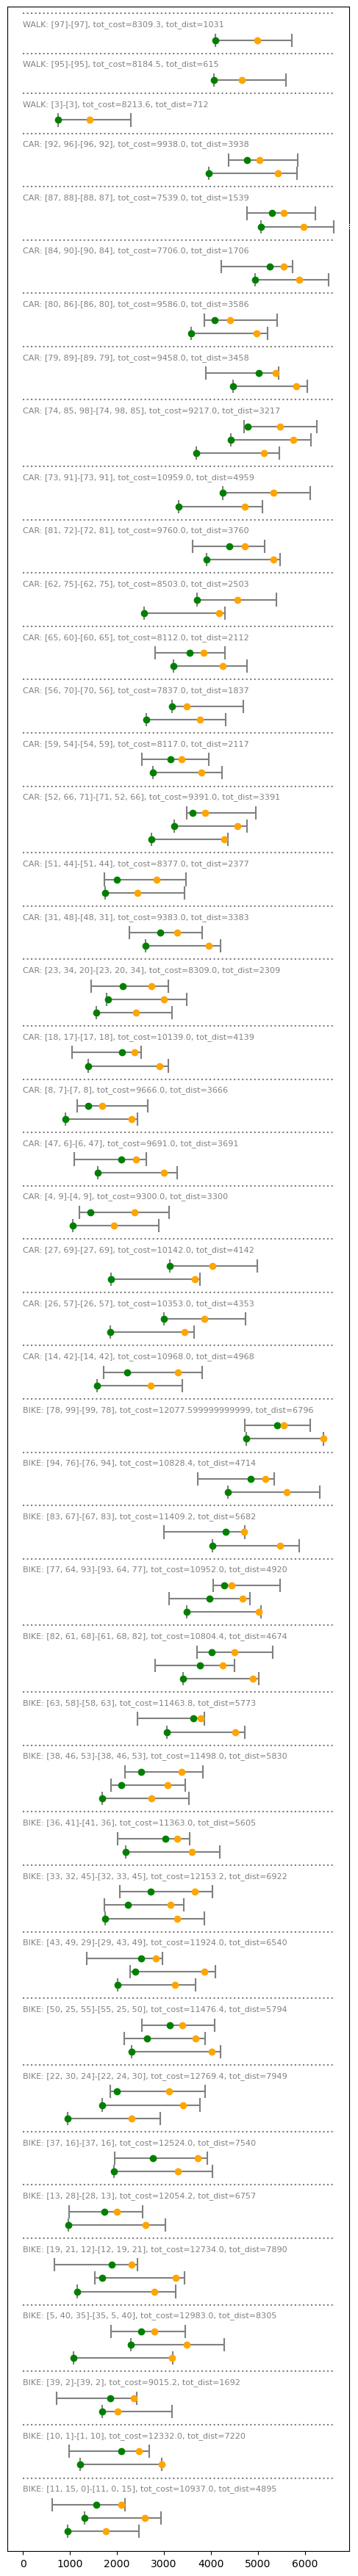

In [23]:
draw_bundle_solution(ALL_ORDERS, ALL_RIDERS, DIST, checked_solution)